In [1]:
import os
import wandb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import cv2

In [2]:
# Пути к изображениям и меткам датасета Dental Condition Dataset.

path_to_data_val_img = "Dental_Condition_Dataset/Caries_Gingivitus_ToothDiscoloration_Ulcer-yolo_annotated-Dataset/Data/images/val/"

val_images_list = os.listdir(path_to_data_val_img)

path_to_data_val_lbl = "Dental_Condition_Dataset/Caries_Gingivitus_ToothDiscoloration_Ulcer-yolo_annotated-Dataset/Data/labels/val/"

val_labels_list = os.listdir(path_to_data_val_lbl)

In [3]:
print(val_images_list[:5])
print()
print(val_labels_list[:5])

['(225).jpg', '(226).jpg', '(227).jpg', '(228).jpg', '(229).jpg']

['(225).txt', '(226).txt', '(227).txt', '(229).txt', '(231).txt']


In [6]:
# Функция для выбора класса по кариесу и перевода координат из COCO формата в человеческий. 
def compute_coordinates(file_name, file_name_image):
    
    coordinates_list = []
    im = Image.open(path_to_data_val_img + file_name_image)
    image_width, image_height = im.size

    with open(file_name, "r") as file:
        
        # итерация по строкам текстового файла
        for line in file:
            coordinates = line.strip().split()
            if coordinates[0] == "0":
                coordinates = coordinates[1:]
                coordinates[0] = float(coordinates[0])*image_width
                coordinates[1] = float(coordinates[1])*image_height
                coordinates[2] = float(coordinates[2])*image_width
                coordinates[3] = float(coordinates[3])*image_height
                
                
                coordinates[0] = coordinates[0] - coordinates[2]/2
                coordinates[1] = coordinates[1] - coordinates[3]/2
            
                print(coordinates)
                coordinates_list.append(coordinates)
            
    file.close       
    
    return coordinates_list


# Функция для отрисовки баундинг боксов на изображениях. Нам нужно сделать наложение чтобы посмотреть качество разметки.
def draw_bbox(image_fullname, image_name, coord):
    
    im = Image.open(image_fullname)
    img = cv2.imread(image_fullname,1) 

    if len(coord) != 0:
               
        fig, ax = plt.subplots()
        ax.imshow(im)

        for box in coord:
            rect = patches.Rectangle((box[0], box[1]), box[2], box[3], linewidth=1, edgecolor='r', facecolor='none')
            cv2.rectangle(img, (int(box[0]), int(box[1])), ( int(box[0] + box[2]), int(box[1] + box[3])), (0, 0, 255), 2) 
            ax.add_patch(rect)
            
        cv2.imwrite("out_val_Dental_Condition_Dataset/" + image_name, img)
        plt.show()
    
    else:
        pass          

[34.351106, 60.882011999999996, 38.392331999999996, 28.28908]
[69.510512, 54.01182, 41.221108, 33.138584]
[111.94406999999998, 49.97044400000001, 36.775732, 25.460264]
[149.12381499999998, 30.168088000000008, 94.56644200000001, 54.557472]


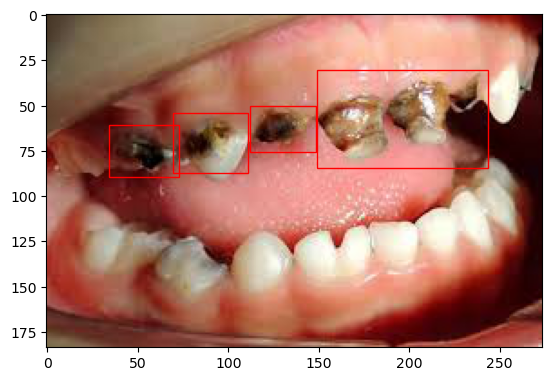

[40.761126, 46.8996255, 41.73167600000001, 33.482367]
[78.610602, 40.591435499999996, 85.889398, 42.216831]
[164.98543949999998, 36.2242035, 56.288939, 34.938009]
[232.9203205, 34.28324549999999, 62.597184999999996, 34.938009]


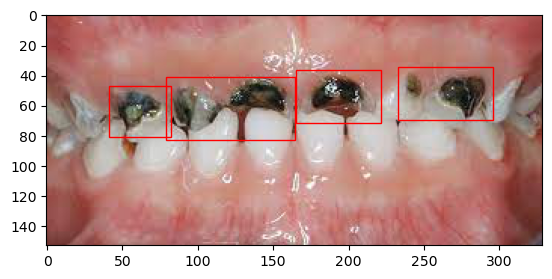

[139.91146199999997, 93.3408025, 71.309628, 65.893855]
[210.318696, 96.0486075, 70.406928, 76.725665]
[328.56627599999996, 97.8540075, 45.132552000000004, 50.548545000000004]
[387.239022, 106.8807125, 30.689964, 39.716735]


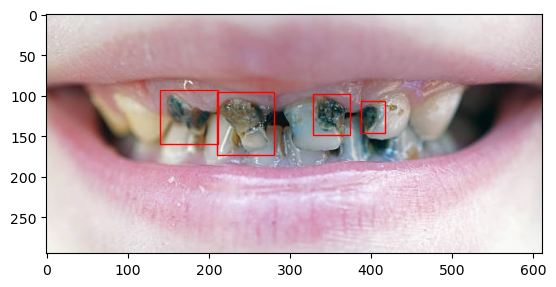

[217.79244, 158.12766, 87.131664, 73.14732]
[185.521986, 194.70131999999998, 61.314444, 53.78508]
[117.75277799999999, 244.18340999999998, 44.10378, 33.34662]
[90.86058000000001, 382.94802000000004, 32.27076, 66.69324]
[307.07589600000006, 167.80878, 72.071568, 51.63372]
[410.34294, 211.91246999999998, 32.27076, 29.0439]
[446.916366, 253.86426, 64.542132, 61.31484]
[99.46621800000001, 421.67331, 50.557932, 41.952059999999996]


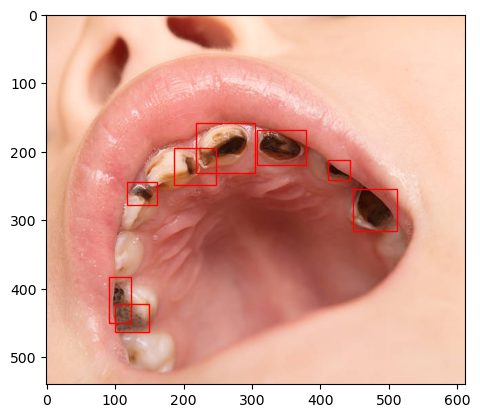

[45.84062, 56.54862, 33.45132, 27.6696]
[78.46621999999999, 53.24481, 32.62532, 31.799339999999997]
[112.33040000000001, 43.333290000000005, 36.34232, 31.38642]
[154.86730000000003, 37.551689999999994, 35.103320000000004, 31.38642]
[188.31862, 62.33031, 12.80244, 18.5841]
[215.57522, 52.83189, 38.82004, 24.365700000000004]
[223.42180000000002, 122.21226, 34.69032, 16.93224]
[247.78768, 84.63132, 14.45416, 19.82304]


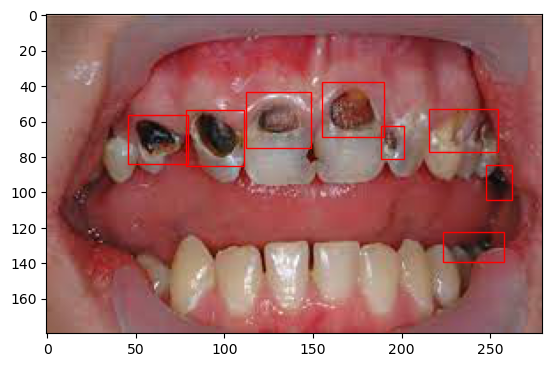

[103.023525, 70.81422900000001, 48.2669, 34.881996]


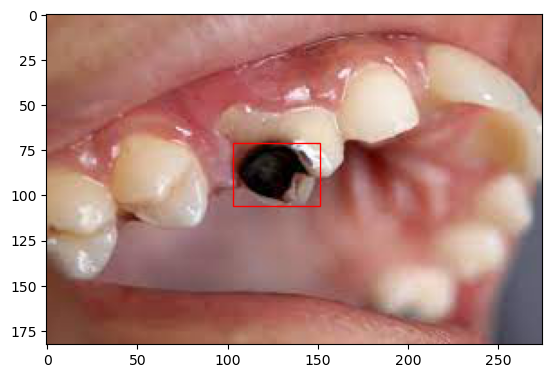

[90.19529999999999, 83.474126, 32.07568, 28.597540000000002]
[138.50187, 90.04374200000001, 35.167339999999996, 21.255028000000003]
[177.53398, 88.11150199999999, 32.07568, 21.641476]
[58.11948999999999, 83.087678, 28.59766, 20.482132]


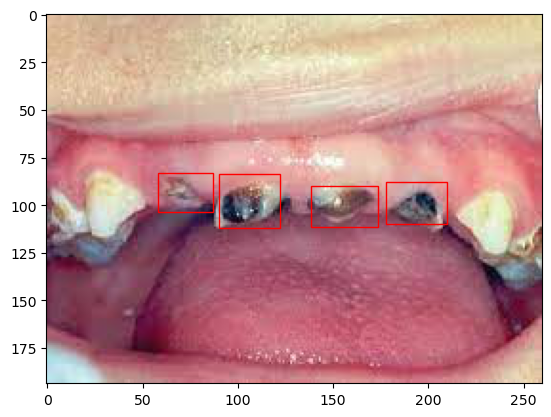

[210.796974, 185.784904, 58.231187999999996, 24.95624]
[266.254884, 194.10349599999998, 24.956136, 25.880528]


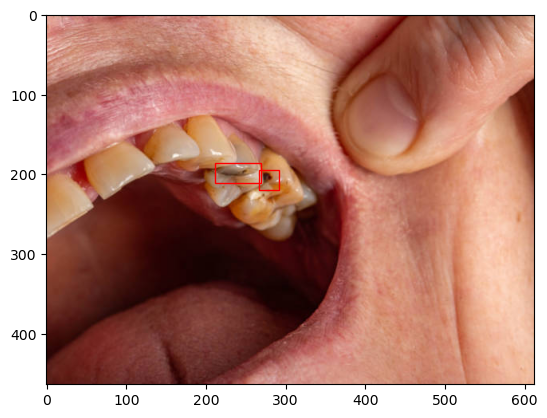

In [7]:
# Пройдемся по всем файлам с разметкой (их оказалось меньше, чем изображений).
# Изображения имеют разный формат, это тоже учтём.

for file_name in val_labels_list:
    file_name_jpg = file_name[:file_name.find(".txt")] + ".jpg"
    file_name_jpeg = file_name[:file_name.find(".txt")] + ".jpeg"
    
    if file_name_jpg in val_images_list:        
        file_name_image = file_name_jpg
        
    elif file_name_jpeg in val_images_list:        
        file_name_image = file_name_jpeg
    
    else:
        file_name_image = ""
        
    if file_name_image != "":
        coordinates_list = compute_coordinates(path_to_data_val_lbl + file_name, file_name_image)

        draw_bbox(path_to_data_val_img + file_name_image, file_name_image, coordinates_list) 
        
    else:
        pass
    

In [ ]:
# Подведем итоги изучения Dental Condition Dataset (в этот ноутбук не попал анализ трейновой части, только валидации).
# Некачественная разметка у датасета. Рамка может захватывать несколько зубов. Часто рамки слишком большие. Иногда, как кариес отмечен зубной камень.
# Придётся либо самим размечать данные, либо брать несколько датасетов и из них выбирать изображения с качественной разметкой. 